In [27]:
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import date
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import mercury as mr
from dateutil.relativedelta import relativedelta

In [28]:
import plotly as py
from plotly.offline import init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [3]:
app = mr.App(title="📈 Stock Price Dashboard", description="Dashboard with financial data", show_code=False)

mercury.App

In [4]:
ticker = mr.Select(label="Please select ticker", value='NVDA', 
                   choices=['NVDA', 'INTC', 'AMD', 'TSM', 'MU'])

mercury.Select

In [5]:
mr.Md(f"# Selected ticker: {ticker.value}")

# Selected ticker: NVDA

In [6]:
period = mr.Numeric(label="Past Month(s)", value=3, min=1, max=12)

mercury.Numeric

In [7]:
# Download NVIDIA Corporation (NVDA) stock data for analysis
stock_data = yf.download(ticker.value, start=date.today() - relativedelta(months=+period.value), end=date.today())
stock_data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-06-28,124.580002,127.709999,122.750000,123.540001,123.529434,315516700
2024-07-01,123.470001,124.839996,118.830002,124.300003,124.289368,284885500
2024-07-02,121.129997,123.410004,121.029999,122.669998,122.659508,218374000
2024-07-03,121.660004,128.279999,121.360001,128.279999,128.269028,215749000
2024-07-05,127.379997,128.850006,125.680000,125.830002,125.819237,214176700
...,...,...,...,...,...,...
2024-09-23,116.550003,116.989998,114.860001,116.260002,116.260002,206228500
2024-09-24,116.519997,121.800003,115.379997,120.870003,120.870003,354966800
2024-09-25,122.019997,124.940002,121.610001,123.510002,123.510002,284692900


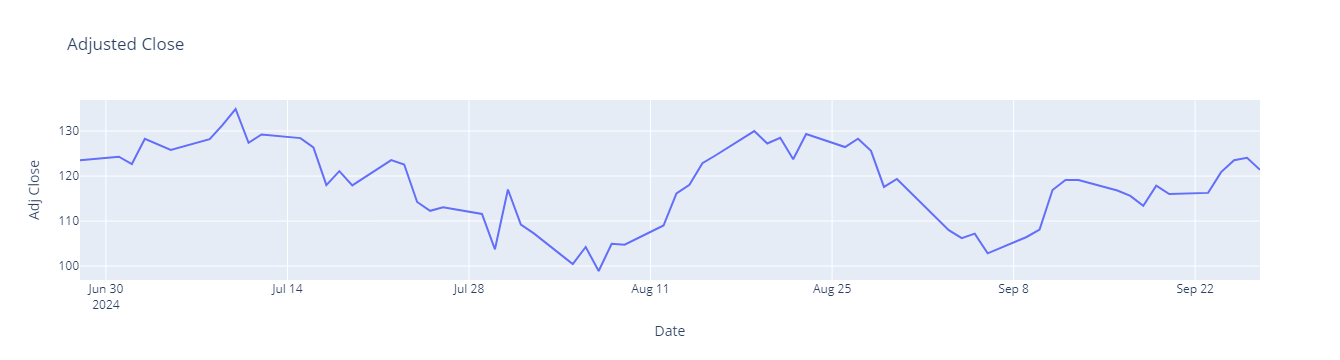

In [10]:
# Create and display an interactive line plot of NVDA's Adjusted Close Prices
import plotly.express as px

# Reset index if 'Date' is the index
stock_data_reset = stock_data.reset_index()

fig = px.line(stock_data_reset, x='Date', y='Adj Close', title='Adjusted Close', line_shape='linear')
fig.show()

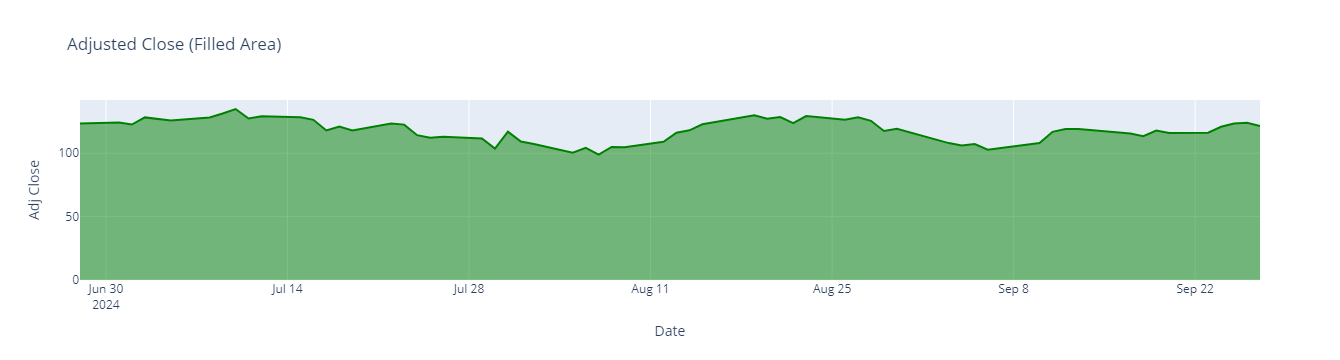

In [13]:
# Create and display an interactive filled area plot of NVDA's Adjusted Close Prices
area_filled = px.area(stock_data, x=stock_data.index, y='Adj Close', 
              title='Adjusted Close (Filled Area)', 
              color_discrete_sequence=['green'])
area_filled.show()

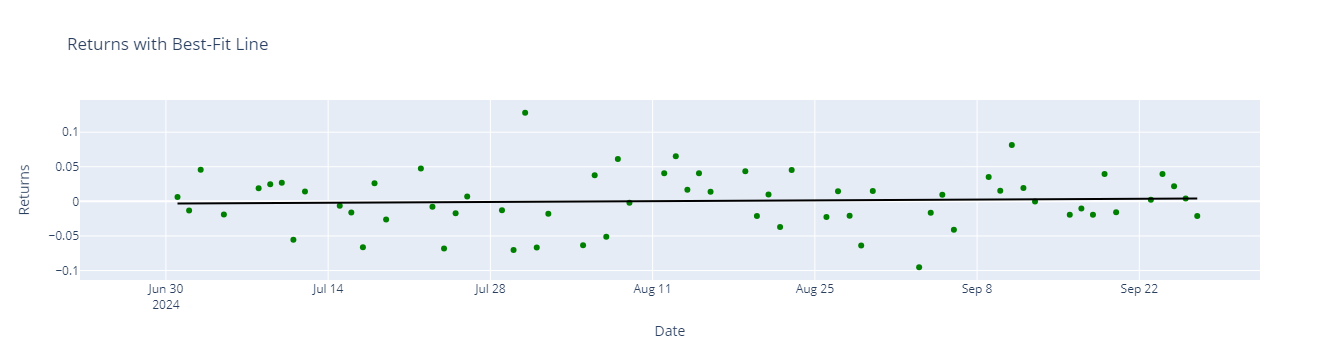

In [14]:
# Create and display an interactive line plot of NVDA's Returns with a best-fit line
stock_data['Returns'] = stock_data['Adj Close'].pct_change()

# Create a scatter plot with a trendline (best-fit line)
returns_plot = px.scatter(stock_data, x=stock_data.index, y='Returns',
                          title='Returns with Best-Fit Line',
                          trendline='ols',  # Add Ordinary Least Squares (OLS) trendline
                          color_discrete_sequence=['green'])

# Customize the trendline color by manually updating the figure
returns_plot.update_traces(marker=dict(color='green'))  # Change point color
returns_plot.data[1].line.color = 'black'  # Change trendline color

# Show the plot
returns_plot.show()

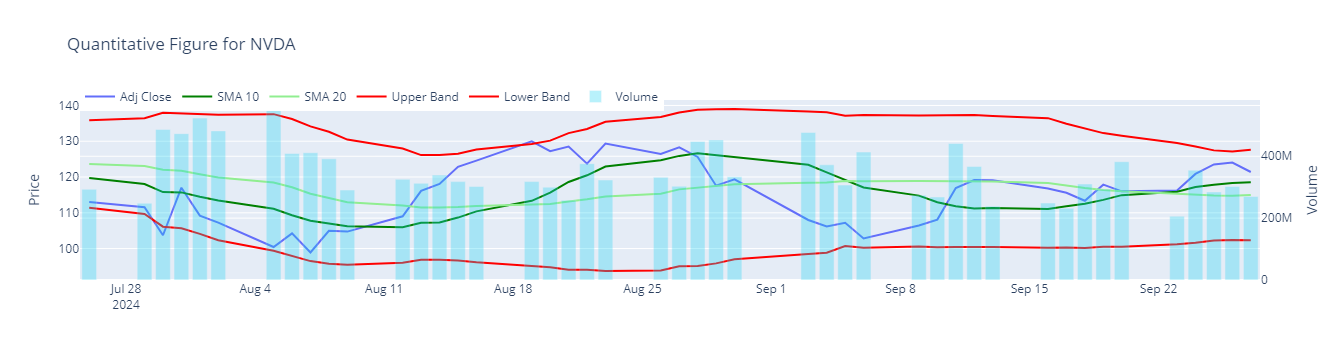

In [15]:
# Create a Quantitative Figure (QuantFig) for the NVDA stock data
import plotly.graph_objects as go
import pandas as pd

# Assuming stock_data is a DataFrame with 'Adj Close' and 'Volume' columns
ticker = 'NVDA'  # Change this to your actual ticker

# Calculate Moving Averages
stock_data['SMA_10'] = stock_data['Adj Close'].rolling(window=10).mean()
stock_data['SMA_20'] = stock_data['Adj Close'].rolling(window=20).mean()

# Calculate Bollinger Bands
stock_data['Upper Band'] = stock_data['SMA_20'] + (stock_data['Adj Close'].rolling(window=20).std() * 2)
stock_data['Lower Band'] = stock_data['SMA_20'] - (stock_data['Adj Close'].rolling(window=20).std() * 2)

# Drop rows with NaN values (optional)
stock_data = stock_data.dropna()

# Create the figure
qf = go.Figure()

# Add Adjusted Close line
qf.add_trace(go.Scatter(x=stock_data.index, y=stock_data['Adj Close'],
                         mode='lines', name='Adj Close'))

# Add Moving Averages
qf.add_trace(go.Scatter(x=stock_data.index, y=stock_data['SMA_10'],
                         mode='lines', name='SMA 10', line=dict(color='green')))
qf.add_trace(go.Scatter(x=stock_data.index, y=stock_data['SMA_20'],
                         mode='lines', name='SMA 20', line=dict(color='lightgreen')))

# Add Bollinger Bands
qf.add_trace(go.Scatter(x=stock_data.index, y=stock_data['Upper Band'],
                         mode='lines', name='Upper Band', line=dict(color='red')))
qf.add_trace(go.Scatter(x=stock_data.index, y=stock_data['Lower Band'],
                         mode='lines', name='Lower Band', line=dict(color='red')))

# Add volume bars
qf.add_trace(go.Bar(x=stock_data.index, y=stock_data['Volume'], name='Volume', 
                     yaxis='y2', opacity=0.3))

# Update layout
qf.update_layout(title=f'Quantitative Figure for {ticker}',
                  yaxis_title='Price',
                  yaxis2=dict(title='Volume', overlaying='y', side='right'),
                  legend=dict(orientation='h', x=0, y=1.1))

# Show the plot
qf.show()


In [16]:
# Download stock data for semiconductor companies
semiconductor_tickers = ['NVDA', 'INTC', 'AMD', 'TSM', 'MU']
semiconductor_data = yf.download(semiconductor_tickers, start=date.today() - relativedelta(months=+period.value), end=date.today())
semiconductor_data

[*********************100%***********************]  5 of 5 completed


Price                       Adj Close                                     \
Ticker                            AMD       INTC          MU        NVDA   
Date                                                                       
2024-06-28 00:00:00+00:00  162.210007  30.774776  131.415054  123.529434   
2024-07-01 00:00:00+00:00  157.690002  30.645597  131.405075  124.289368   
2024-07-02 00:00:00+00:00  164.309998  30.874147  132.474136  122.659508   
2024-07-03 00:00:00+00:00  163.899994  31.033138  136.700439  128.269028   
2024-07-05 00:00:00+00:00  171.899994  31.818159  131.485001  125.819237   
...                               ...        ...         ...         ...   
2024-09-23 00:00:00+00:00  156.750000  22.559999   93.570000  116.260002   
2024-09-24 00:00:00+00:00  158.320007  22.809999   94.000000  120.870003   
2024-09-25 00:00:00+00:00  162.020004  23.540001   95.769997  123.510002   
2024-09-26 00:00:00+00:00  167.490005  23.920000  109.879997  124.040001   
2024-09-27 00:00:00+00:00  164.350006  23.910000  107.500000  121.400002   

Price                                       Close                         \
Ticker                            TSM         AMD       INTC          MU   
Date                                                                       
2024-06-28 00:00:00+00:00  173.170837  162.210007  30.969999  131.529999   
2024-07-01 00:00:00+00:00  171.696274  157.690002  30.840000  131.520004   
2024-07-02 00:00:00+00:00  175.053879  164.309998  31.070000  132.589996   
2024-07-03 00:00:00+00:00  181.818924  163.899994  31.230000  136.820007   
2024-07-05 00:00:00+00:00  183.313400  171.899994  32.020000  131.600006   
...                               ...         ...        ...         ...   
2024-09-23 00:00:00+00:00  174.759995  156.750000  22.559999   93.570000   
2024-09-24 00:00:00+00:00  181.970001  158.320007  22.809999   94.000000   
2024-09-25 00:00:00+00:00  182.350006  162.020004  23.540001   95.769997   
2024-09-26 00:00:00+00:00  186.830002  167.490005  23.920000  109.879997   
2024-09-27 00:00:00+00:00  177.970001  164.350006  23.910000  107.500000   

Price                                              ...        Open             \
Ticker                           NVDA         TSM  ...         AMD       INTC   
Date                                               ...                          
2024-06-28 00:00:00+00:00  123.540001  173.809998  ...  160.229996  30.750000   
2024-07-01 00:00:00+00:00  124.300003  172.330002  ...  161.250000  30.910000   
2024-07-02 00:00:00+00:00  122.669998  175.699997  ...  157.039993  30.860001   
2024-07-03 00:00:00+00:00  128.279999  182.490005  ...  164.199997  31.120001   
2024-07-05 00:00:00+00:00  125.830002  183.990005  ...  165.970001  31.400000   
...                               ...         ...  ...         ...        ...   
2024-09-23 00:00:00+00:00  116.260002  174.759995  ...  156.449997  22.430000   
2024-09-24 00:00:00+00:00  120.870003  181.970001  ...  157.460007  22.530001   
2024-09-25 00:00:00+00:00  123.510002  182.350006  ...  158.500000  22.799999   
2024-09-26 00:00:00+00:00  124.040001  186.830002  ...  167.059998  24.280001   
2024-09-27 00:00:00+00:00  121.400002  177.970001  ...  167.479996  24.160000   

Price                                                            Volume  \
Ticker                             MU        NVDA         TSM       AMD   
Date                                                                      
2024-06-28 00:00:00+00:00  132.820007  124.580002  172.809998  56204600   
2024-07-01 00:00:00+00:00  130.500000  123.470001  174.240005  50436700   
2024-07-02 00:00:00+00:00  129.910004  121.129997  171.130005  57838600   
2024-07-03 00:00:00+00:00  132.660004  121.660004  177.990005  26980900   
2024-07-05 00:00:00+00:00  136.820007  127.379997  184.139999  61857100   
...                               ...         ...         ...       ...   
2024-09-23 00:00:00+00:00   92.680000  116.550003  174.83999

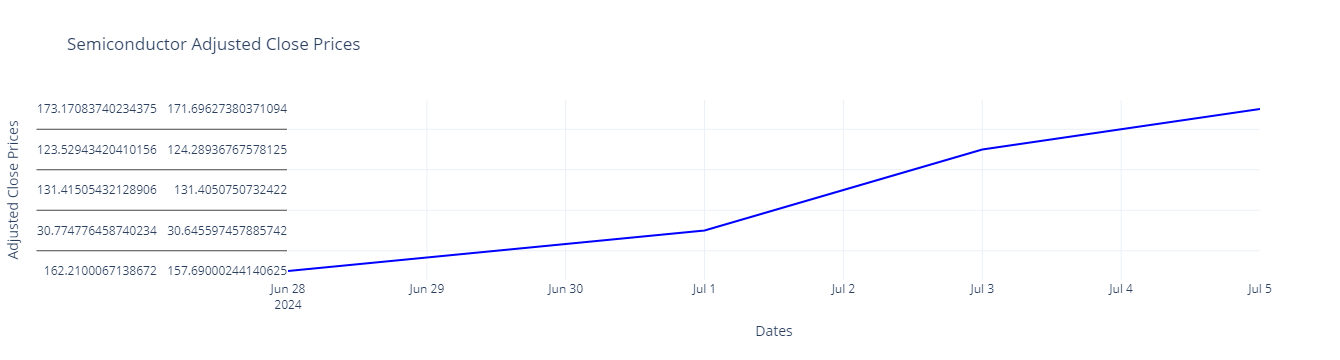

In [18]:
# Create and display an interactive line plot of Adjusted Close Prices for semiconductor companies
newclosing = go.Figure()
newclosing.add_trace(go.Scatter(x=semiconductor_data.index, 
                         y=semiconductor_data['Adj Close'], 
                         mode='lines', 
                         name='Adjusted Close', 
                         line=dict(color='blue')))
newclosing.update_layout(title='Semiconductor Adjusted Close Prices',
                  xaxis_title='Dates',
                  yaxis_title='Adjusted Close Prices',
                  template='plotly_white')
newclosing.show()

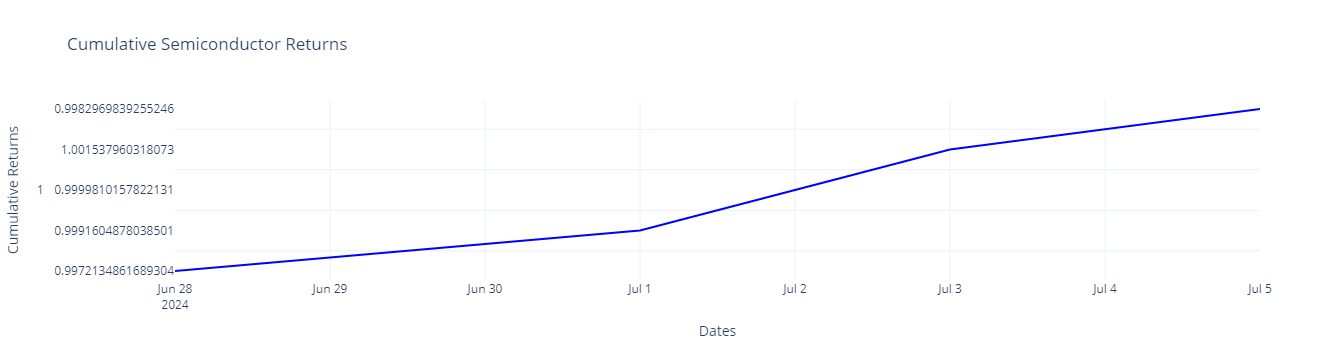

In [23]:
semiconductor_returns = semiconductor_data['Adj Close'].pct_change()  # Calculate daily returns
semiconductor_returns.iloc[0, :] = 0  # Set the initial value of returns to 0 (first day)

# Define the weights for each company in the portfolio
weights = np.array([0.1, 0.2, 0.25, 0.25, 0.2])  # Adjust these weights as needed

# Calculate the weighted returns for each company
weighted_returns = weights * semiconductor_returns

# Calculate cumulative returns for the portfolio
cumulative_returns = (weighted_returns + 1).cumprod()

# Create the figure
fig = go.Figure()

# Add cumulative returns line plot
fig.add_trace(go.Scatter(x=cumulative_returns.index, 
                         y=cumulative_returns.values, 
                         mode='lines', 
                         name='Cumulative Returns', 
                         line=dict(color='blue')))

# Update layout
fig.update_layout(title='Cumulative Semiconductor Returns',
                  xaxis_title='Dates',
                  yaxis_title='Cumulative Returns',
                  template='plotly_white')

# Show the plot
fig.show()
